<a href="https://colab.research.google.com/github/ashwaqhussain12/yT5/blob/master/prg0ap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Here we are Plotting the dataset values in the Graph

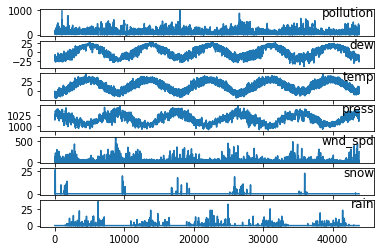

In [2]:
from pandas import read_csv
from datetime import datetime
import pandas as pd
# load data
def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')
dataset = read_csv('/content/drive/My Drive/datasets/PRSA_data_2010.1.1-2014.12.31.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset.drop('No', axis=1, inplace=True)
# manually specify column names
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
data4 = dataset
dataset.index.name = 'date'

from matplotlib import pyplot
values = dataset.values
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

Here we are Taking four parameters Pressure, Temperature, Dew Point, Wind Speed. These parameters are taken into a new Dataframe. 

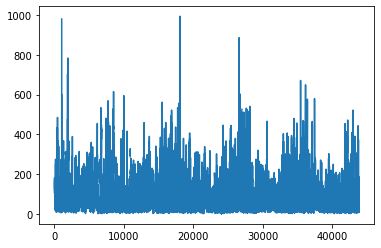

In [3]:
import numpy as np
import plotly
import matplotlib.pyplot as plt
# 'exec(%matplotlib inline)'

import warnings
warnings.filterwarnings("ignore")

from fbprophet import Prophet

data3 = pd.read_csv('/content/drive/My Drive/datasets/PRSA_data_2010.1.1-2014.12.31.csv')

data3['datep'] = data3[data3.columns[1:4]].apply(lambda x: '-'.join(x.astype(str)),axis=1)

temp = data3[['datep','pm2.5']]
temp.columns = ['ds','y']
temp['PRES'] = data3['PRES']
temp['DEWP'] = data3['DEWP']
temp['TEMP'] = data3['TEMP']
temp['Iws'] = data3['Iws']

#temp.y.plot()
plt.plot(temp.y)
#print(temp.head())

temp_pres = data3[['datep', 'PRES']]
temp_pres.columns = ['ds','y']

temp_dewp = data3[['datep', 'DEWP']]
temp_dewp.columns = ['ds','y']

temp_tem = data3[['datep', 'TEMP']]
temp_tem.columns = ['ds','y']

temp_iws = data3[['datep', 'Iws']]
temp_iws.columns = ['ds','y']


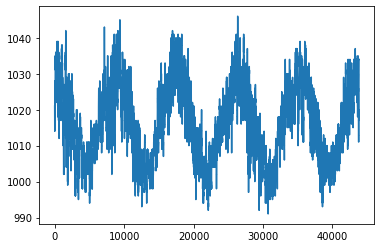

In [4]:
plt.plot(temp_pres.y)

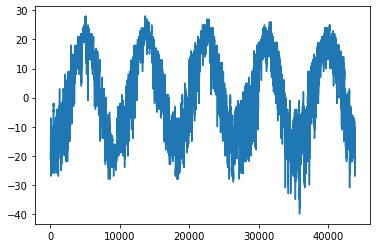

In [5]:
plt.plot(temp_dewp.y)

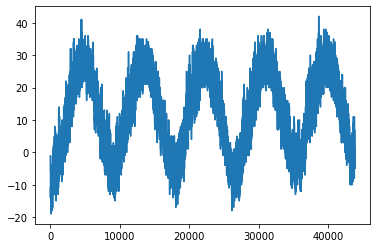

In [6]:
plt.plot(temp_tem.y)

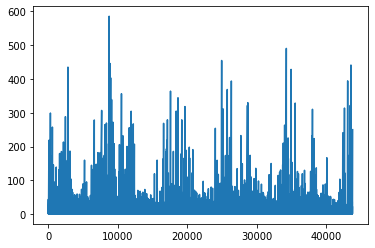

In [7]:
plt.plot(temp_iws.y)

Using the Univariate Time series Forecasting, we Predicting those four parameters.

In [8]:
model = Prophet()
#model.add_regressor('PRES', standardize = "auto", mode='additive')
model.add_regressor('PRES')
model.add_regressor('DEWP')
model.add_regressor('TEMP')
model.add_regressor('Iws')
model.fit(temp)


# initializing the fbprophet model and fitting the data ===pressure===
model = Prophet()
model.fit(temp_pres)

#creating a separate dataframe for predicted values
future_data_pres = model.make_future_dataframe(periods=365, freq = 'd')
forecast_data_pres = model.predict(future_data_pres)


# initializing the fbprophet model and fitting the data ===Dew point===
model = Prophet()
model.fit(temp_dewp)

#creating a separate dataframe for predicted values
future_data_dewp = model.make_future_dataframe(periods=365, freq = 'd')
forecast_data_dewp = model.predict(future_data_dewp)


# initializing the fbprophet model and fitting the data  ===Temperature===
model = Prophet()
model.fit(temp_tem)

#creating a separate dataframe for predicted values
future_data_tem = model.make_future_dataframe(periods=365, freq = 'd')
forecast_data_tem = model.predict(future_data_tem)


# initializing the fbprophet model and fitting the data  ===wind speed===
model = Prophet()
model.fit(temp_iws)

#creating a separate dataframe for predicted values
future_data_iws = model.make_future_dataframe(periods=365, freq = 'd')
forecast_data_iws = model.predict(future_data_iws)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
temp['ds']=pd.to_datetime(temp['ds'])
temp=temp.set_index('ds')

Data Index is set according to the Prophet function.

In [10]:
forecast_data_pres['ds']=pd.to_datetime(forecast_data_pres['ds'])
forecast_data_pres=forecast_data_pres.set_index('ds')
forecast_data_dewp['ds']=pd.to_datetime(forecast_data_dewp['ds'])
forecast_data_dewp=forecast_data_dewp.set_index('ds')
forecast_data_tem['ds']=pd.to_datetime(forecast_data_tem['ds'])
forecast_data_tem=forecast_data_tem.set_index('ds')
forecast_data_iws['ds']=pd.to_datetime(forecast_data_iws['ds'])
forecast_data_iws=forecast_data_iws.set_index('ds')

Using DATE, we are acessing values of those four parameters

In [11]:
def pres_temp(ds):
    date = (pd.to_datetime(ds)).date()
    if temp[date:].empty:
        return forecast_data_pres[date:]['yhat'].values[0]
    else:
        return (temp[date:]['PRES']).values[0]
    
    return 0

def dewp_temp(ds):
    date = (pd.to_datetime(ds)).date()
    
    if temp[date:].empty:
        return forecast_data_dewp[date:]['yhat'].values[0]
    else:
        return (temp[date:]['DEWP']).values[0]
    
    return 0

def tem_temp(ds):
    date = (pd.to_datetime(ds)).date()
    
    if temp[date:].empty:
        return forecast_data_tem[date:]['yhat'].values[0]
    else:
        return (temp[date:]['TEMP']).values[0]
    
    return 0

def iws_temp(ds):
    date = (pd.to_datetime(ds)).date()
    
    if temp[date:].empty:
        return forecast_data_iws[date:]['yhat'].values[0]
    else:
        return (temp[date:]['Iws']).values[0]
    
    return 0

Using Multivariate Time Series, the PM2.5 values are Forecasted along with boundaries.

In [12]:
#creating a separate dataframe for predicted values
future_data = model.make_future_dataframe(periods=365, freq = 'd')
future_data['PRES'] = future_data['ds'].apply(pres_temp)
future_data['DEWP'] = future_data['ds'].apply(dewp_temp)
future_data['TEMP'] = future_data['ds'].apply(tem_temp)
future_data['Iws'] = future_data['ds'].apply(iws_temp)
#forecast_data = model.predict(future_data.drop(columns='y'))
forecast_data = model.predict(future_data)

print(forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(365))

             ds       yhat  yhat_lower  yhat_upper
1826 2015-01-01  57.050520   -6.302934  124.411638
1827 2015-01-02  54.514218   -7.791024  115.686825
1828 2015-01-03  50.542137   -7.275989  117.379814
1829 2015-01-04  55.426845   -5.290219  120.414495
1830 2015-01-05  51.626504  -10.578059  112.812568
...         ...        ...         ...         ...
2186 2015-12-27  68.012249   -5.497692  134.869152
2187 2015-12-28  65.662502   -3.094878  140.534304
2188 2015-12-29  66.581362   -4.831705  140.157226
2189 2015-12-30  68.156092   -6.170946  146.771800
2190 2015-12-31  66.240484   -0.812170  142.891444

[365 rows x 4 columns]


In [13]:
pd.set_option('display.max_rows', None)

In [14]:
tempuni = data3[['datep','pm2.5']]
tempuni.columns = ['ds','y']
model = Prophet()
model.fit(tempuni)
future_data_uni = model.make_future_dataframe(periods=365, freq = 'd')
forecast_data_uni = model.predict(future_data_uni)
print(forecast_data_uni[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(365))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat  yhat_lower  yhat_upper
1826 2015-01-01   99.590412  -21.959576  206.419216
1827 2015-01-02  106.423974   -5.082488  221.049830
1828 2015-01-03  114.689396   -1.726543  235.847465
1829 2015-01-04  113.776324    4.324803  234.963930
1830 2015-01-05  112.002088   -0.887324  215.897636
1831 2015-01-06  119.494394    5.612642  224.282678
1832 2015-01-07  124.068394    1.802049  245.718128
1833 2015-01-08  126.517038   15.257926  242.122726
1834 2015-01-09  131.989959   17.473179  246.712530
1835 2015-01-10  138.393465   22.519017  255.712104
1836 2015-01-11  135.155079   20.906201  247.419239
1837 2015-01-12  130.640852   10.843525  238.423389
1838 2015-01-13  135.037056   20.718172  245.213082
1839 2015-01-14  136.226016   19.118226  245.608505
1840 2015-01-15  135.075007   20.682267  254.331075
1841 2015-01-16  136.813485   26.367065  250.066184
1842 2015-01-17  139.431287   30.808128  251.872237
1843 2015-01-18  132.441264   11.645240  242.329950
1844 2015-01

In [15]:
mergedStuff = pd.merge(forecast_data, forecast_data_uni, on=['ds'], how='inner')

In [16]:
mergedStuff.to_string(index=False)
print(mergedStuff[['ds', 'yhat_x', 'yhat_y']].tail(365))

             ds     yhat_x      yhat_y
1826 2015-01-01  57.050520   99.590412
1827 2015-01-02  54.514218  106.423974
1828 2015-01-03  50.542137  114.689396
1829 2015-01-04  55.426845  113.776324
1830 2015-01-05  51.626504  112.002088
1831 2015-01-06  51.213961  119.494394
1832 2015-01-07  51.596474  124.068394
1833 2015-01-08  48.643994  126.517038
1834 2015-01-09  45.458909  131.989959
1835 2015-01-10  40.991929  138.393465
1836 2015-01-11  45.536171  135.155079
1837 2015-01-12  41.546735  130.640852
1838 2015-01-13  41.089995  135.037056
1839 2015-01-14  41.563618  136.226016
1840 2015-01-15  38.825204  135.075007
1841 2015-01-16  35.962455  136.813485
1842 2015-01-17  31.909536  139.431287
1843 2015-01-18  36.941674  132.441264
1844 2015-01-19  33.495257  124.294623
1845 2015-01-20  33.617678  125.260634
1846 2015-01-21  34.687869  123.300507
1847 2015-01-22  32.545464  119.354412
1848 2015-01-23  30.261432  118.716964
1849 2015-01-24  26.754866  119.433835
1850 2015-01-25  32.28794

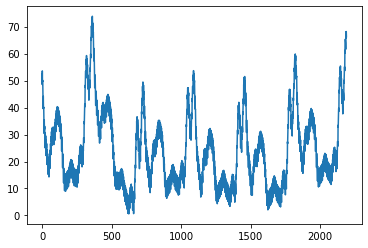

In [17]:
plt.plot(mergedStuff.yhat_x)

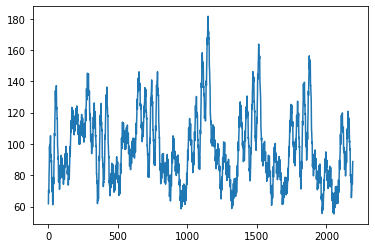

In [18]:
plt.plot(mergedStuff.yhat_y)

KeyError: ignored

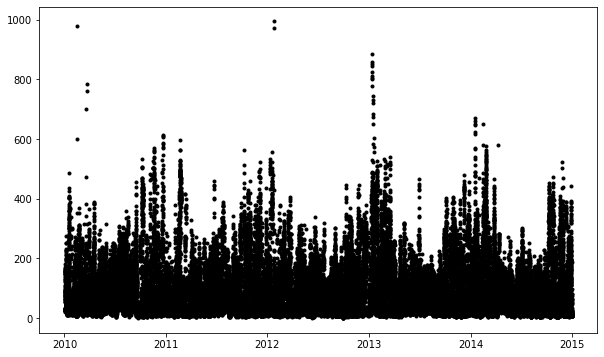

In [19]:
figure = model.plot(future_data, xlabel='date', ylabel='PM2.5')

KeyError: ignored

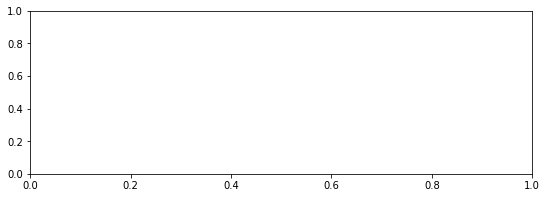

In [20]:
figure2 = model.plot_components(future_data)

In [21]:
from fbprophet.plot import plot_plotly

fig = plot_plotly(model, forecast_data)
fig.show(renderer="colab")

In [22]:
figu = plot_plotly(model, forecast_data_uni)
figu.show(renderer="colab")